# Guided Project: Predicting Car Prices

In this course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [1]:
import numpy as np
import pandas as pd

pd.set_option('max_columns', 30)

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']



cars = pd.read_csv('imports-85.data', names = cols )
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [2]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning Rows With Missing Data

As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

### Why Rescale?

Wikipedia: Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.





In [3]:
# replace ? with np.nan
numeric_cars = numeric_cars.replace('?', np.nan)

#Convert object cols to numeric

numeric_cars = numeric_cars.astype(float)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [4]:
# cells in the normalized losses column with missing values.
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Out of 25 rows, 41 rows have missing data for the normalized-losses column (20% of the data set). Whilst the maxmium for other columns is either 2 or 4 rows respectively. It therefore makes sense to drop the column as there is relevant data in the other columns for these rows.

In [5]:
numeric_cars = numeric_cars.drop(['normalized-losses'], axis=1)

In [6]:
#As we are predicting price, the 4 null value price rows will be dropped.

numeric_cars = numeric_cars.dropna(subset = ['price'])
numeric_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [7]:
numeric_cars.isnull().sort_values('bore', ascending = False)
# The small number of errors do not occur in the same rows, so we will replace them with the mean.

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,False,False,False,False,False,False,True,True,False,False,False,False,False,False
56,False,False,False,False,False,False,True,True,False,False,False,False,False,False
57,False,False,False,False,False,False,True,True,False,False,False,False,False,False
58,False,False,False,False,False,False,True,True,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False,False,False,False,False,False,False,False
78,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Replace null values with mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

#check
numeric_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

## Normalizing The Numeric Columns

Rescaling (min-max normalization)
Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as: 

In [9]:
#Normalise all columns except the price column
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head()


,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate K-nearest Neighbors Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Randomise the rows in the df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split the df into a training set and test set by dividing by 2
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    #fit a KNN model using a default k (5).
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    #Make preictions using the model
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculate the mse and rmse
    
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse
    
# Use this function to train and test univariate models using the different numeric columns in the data set.

rmse_values = {}
train_cols = numeric_cars.columns.drop('price')

# For the columns in the df minus price, train the model, return the rmse value and add the the rmse values dict

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    rmse_values[col] = rmse_value
    
# series object of the dictionary so that it is easily readable

rmse_series_results = pd.Series(rmse_values)
rmse_series_results.sort_values()
    

engine-size         3238.462830
horsepower          4037.037713
curb-weight         4401.118255
highway-mpg         4630.026799
width               4704.482590
city-mpg            4766.422505
length              5427.200961
wheel-base          5461.553998
compression-rate    6610.812153
bore                6780.627785
peak-rpm            7697.459696
stroke              8006.529545
height              8144.441043
dtype: float64

### Modifying The Function

Modify the knn_train_test() function you wrote to accept a parameter for the k value.

- Update the function logic to use this parameter.
- For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.



In [11]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    #Randomise the rows in the df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split the df into a training set and test set by dividing by 2
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        
        #fit a KNN model
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        #Make preictions using the model
        predictions = knn.predict(test_df[[train_col]])
    
        # Calculate the mse and rmse
    
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
        
    
# Use this function to train and test univariate models using the different numeric columns in the data set.

k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For the columns in the df minus price, train the model, return the rmse value and add the the rmse values dict

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_value
    
k_rmse_results


{'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006.529

### Visualize the results using a line plot.

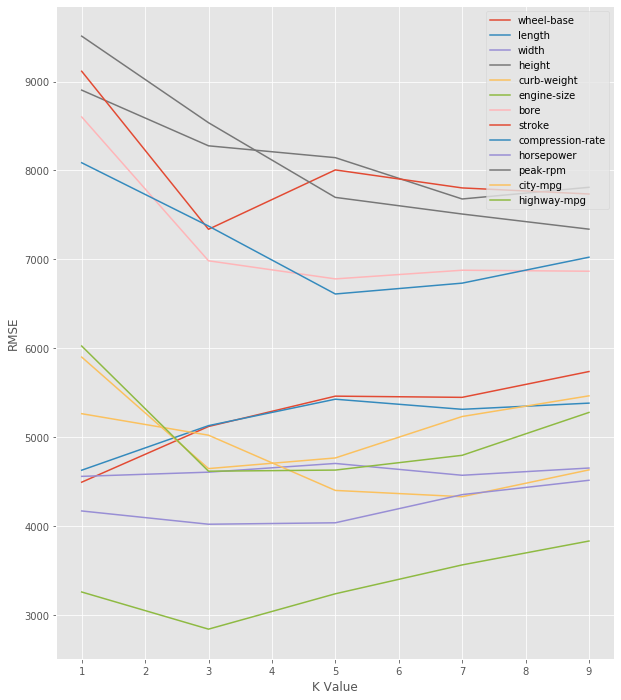

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,12))
for k,v in k_rmse_results.items():
    x,y = zip(*sorted(v.items()))

    plt.plot(x,y,label=k)
    plt.ylabel('RMSE')
    plt.xlabel('K Value')
    

plt.legend(loc ='best')
plt.show()

In [13]:
# Compute the average RMSE across different k values for each feature

feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index
# This will be used in the next step as part of the multivariate model 

engine-size         3346.484586
horsepower          4219.377860
width               4618.910560
curb-weight         4730.075815
highway-mpg         5069.469256
length              5176.394904
city-mpg            5202.409003
wheel-base          5252.392462
compression-rate    7166.073599
bore                7222.472445
stroke              8000.240467
peak-rpm            8119.365233
height              8163.346266
dtype: float64


## Multivariate Model

In [14]:
def knn_train_test(train_cols, target_col, df):
    
    np.random.seed(1)
    
    #Randomise the rows in the df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split the df into a training set and test set by dividing by 2
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        
        #fit a KNN model
        knn.fit(train_df[train_cols], train_df[target_col])
    
        #Make preictions using the model
        predictions = knn.predict(test_df[train_cols])
    
        # Calculate the mse and rmse
    
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}        
for nr_best_feats in range(2,6):
    k_rmse_results['{} best features: '.format(nr_best_feats)] = knn_train_test(sorted_features[:nr_best_feats], 'price', numeric_cars)

k_rmse_results    


{'2 best features: ': {5: 2949.8817277180374},
 '3 best features: ': {5: 3580.7376651928435},
 '4 best features: ': {5: 3487.340917327035},
 '5 best features: ': {5: 3410.2170133901805}}

## Hyperparameter Tuning

In [15]:
def knn_train_test(train_cols, target_col, df):
    
    np.random.seed(1)
    
    #Randomise the rows in the df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split the df into a training set and test set by dividing by 2
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [x for x in range(1,26)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        
        #fit a KNN model
        knn.fit(train_df[train_cols], train_df[target_col])
    
        #Make preictions using the model
        predictions = knn.predict(test_df[train_cols])
    
        # Calculate the mse and rmse
    
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}        
for nr_best_feats in range(2,6):
    k_rmse_results['{} best features: '.format(nr_best_feats)] = knn_train_test(sorted_features[:nr_best_feats], 'price', numeric_cars)

k_rmse_results    


{'2 best features: ': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features: ': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.2

### Plotting The RMSE Values

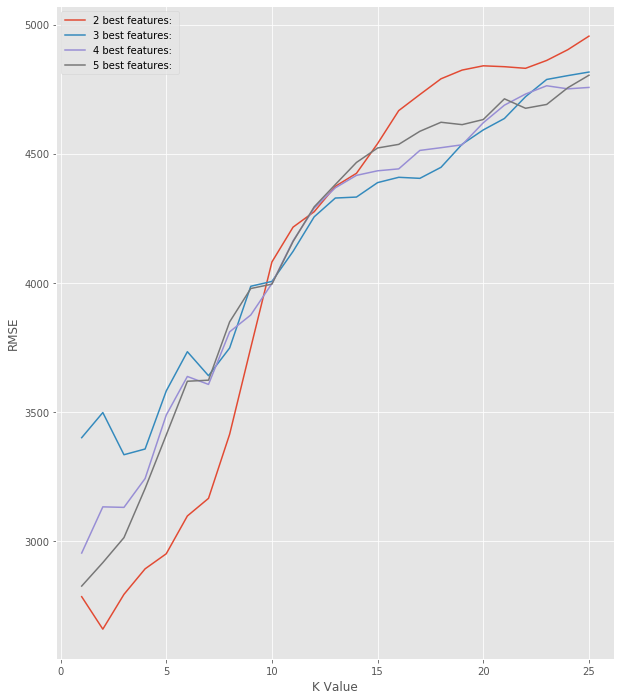

In [16]:

plt.figure(figsize=(10,12))
for k,v in k_rmse_results.items():
    x,y = zip(*sorted(v.items()))

    plt.plot(x,y,label=k)
    plt.ylabel('RMSE')
    plt.xlabel('K Value')
    plt.legend(loc ='best')
plt.show()

In [17]:
lowest_rmses = {}
for k,v in k_rmse_results.items():
    temp = min(v.values())
    res = [key for key in v if v[key] == temp]
    lowest_rmses[k] = 'Optimal K Value - {value}'.format(value = res)
    
lowest_rmses     
    

{'2 best features: ': 'Optimal K Value - [2]',
 '3 best features: ': 'Optimal K Value - [3]',
 '4 best features: ': 'Optimal K Value - [1]',
 '5 best features: ': 'Optimal K Value - [1]'}

Our graph shows that the optimal model contains the two best features, engine size and horsepower using a k vaue of 2.

## Learning Summary

Concepts explored: pandas, data cleaning, features engineering, k-nearest neighbors, hyperparameter tuning, RMSE

Functions and methods used: .read_csv(), .replace(), .drop(), .astype(), isnull().sum(), .min(), .max(), .mean(), .permutation(), .reindex(), .iloc[], .fit(), .predict(), mean_squared_error(), .Series(), .sort_values(), .plot(), .legend()